# Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.


## Introducción

En el mundo de los videojuegos, predecir el éxito de un título es una tarea crucial para diseñar estrategias de marketing efectivas y asegurar la satisfacción del cliente. Este proyecto tiene como objetivo utilizar datos históricos y técnicas de análisis para identificar patrones que puedan predecir el éxito de un videojuego en el mercado global.

Lo anterior basandonos con un conjunto de datos valioso que abarca desde 2016 y contiene información detallada sobre reseñas de usuarios y expertos, géneros, plataformas (como Xbox o PlayStation) y datos históricos de ventas. 

La meta principal es identificar patrones y correlaciones que nos permitan determinar qué características influyen en el éxito de un videojuego. Este análisis no solo ayudará a prever las ventas futuras basadas en datos pasados, sino que también proporcionará una base sólida para tomar decisiones estratégicas en marketing y desarrollo de productos.

### Inicialización

In [100]:
# Cargar todas las librerías que creemos vamos a utilizar

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

### Cargar datos

In [101]:
# Cargamos el archivo de datos en un DataFrame

games_df = pd.read_csv('/datasets/games.csv')

## Preparación de los datos

### Games

In [102]:
#mostramos la informacion del dataframe con el metodo info()
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [103]:
#mostramos las primeras filas el dataframe
print(games_df.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [104]:
#convertimos los nombres de las columnas a letras minusculas

games_df.columns = games_df.columns.str.lower()


In [105]:
#validamos los tipos de datos y convertimos la columna year_of_release al tipo Int64

games_df['year_of_release'] = games_df['year_of_release'].astype('Int64')

#validamos que haya cambiado el tipo entero con el metodo info() de nuevo
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


Las columnas se encuentran en el tipo de datos correcto excepto la columna "year_of_release",que se encuentra en tipo float y se requiere convertir a entero ya que dicho valor corresponde al año de lanzamiento el cual no puede ser de tipo float. 

#### Valores duplicados

In [106]:
#validamos si tenemos valores duplicados con el metodo duplicated()
print(games_df.duplicated().sum())

0


#### Valores ausentes

In [107]:
#validamos si tenemos valores ausentes con el metodo isna()
print(games_df.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [108]:
#eliminamos los valores ausentes de las columnas 'name' y 'genre' con el metodo dropna

games_df.dropna(subset=['name', 'genre'], inplace= True)

#validamos nuevamente que ya no tengamos valore en dichas columnas
print(games_df['name'].isna().sum()) 
print(games_df['genre'].isna().sum()) 

0
0


In [109]:
#rellenamos los valores ausentes de las columnas 'year_of_release' con la mediana de los años
median_year = games_df['year_of_release'].median()
median_year = int(median_year)  # colocamos el valor de la mediana como numero entero

games_df['year_of_release'].fillna(median_year, inplace= True)

#validamos nuevamente el numero de valores ausentes 
print(games_df['year_of_release'].isna().sum())

0


In [110]:
#rellenamos los valores ausentes de la columna 'critic_score' con la mediana de la critica
median_score = games_df['critic_score'].median()

games_df['critic_score'].fillna(median_score, inplace= True)

#validamos nuevamente el numero de valores ausentes 
print(games_df['critic_score'].isna().sum())


0


In [111]:

# Reemplazamos 'TBD' por NaN en la columna 'user_score'
games_df['user_score'] = games_df['user_score'].replace('tbd', np.nan)

# Reemplazamos otros posibles valores no numéricos con NaN
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce')

#rellenamos los valores ausentes de la columna 'user_score' con la media de la calificacion del usuario
mean_user = games_df['user_score'].mean()

games_df['user_score'].fillna(mean_user, inplace= True)

#validamos nuevamente el numero de valores ausentes 
print(games_df['user_score'].isna().sum())

0


In [112]:
#rellenamos los valores ausentes de la columna 'rating' con la palabra 'unknown'

games_df['rating'].fillna('unknown', inplace= True)

#validamos nuevamente el numero de valores ausentes 
print(games_df['rating'].isna().sum()) 

#validamos nuevamente en todas las columnas que no tengamos valores ausentes
print(games_df.isna().sum()) 

0
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


se realiza la validacion de los valores ausentes donde se evidencia valores en las columnas: name, genre, year_of_release, critic_score, user_score y rating.
evidenciamos que los valores ausentes (2) de la columna name y genre son los mismos, ya que nuestro objetivo del proyecto es identificar patrones para determinar si un juego tiene exito o no, el nombre del juego y el género son fundamentales para cualquier análisis que involucre tendencias y patrones en el mercado de videojuegos. Sin estos valores, el análisis pierde contexto. por lo anterior se procede a eliminar esos valores ausentes ya que son solo 2 valores y sin su nombre o genero podriamos tener un analisis erroneo.

evidenciamos que los valores ausentes de la columna year_of_release (269) no son muchos, sin embargo, dichos valores no deberian ser eliminados ya que tiene valores considerables en ventas que son necesarios para un futuro analisis, por lo anterior se procede a rellenar dichos valores con un valor neutro como la mediana.

los valores ausentes de la columna critic_score (8578) son bastante considerables por lo que procedimos a rellenar dichos valores con un valor promedio, para este caso la media y mediana eran muy similar sin embargo, la mediana es menos sensible a los valores extremos y puede proporcionar una representación más robusta del puntaje típico, razon por la cual elegimos la mediana.

la columna user_score presentaba valores como 'tbd' (por ser determinados) por lo cual al no conocerlos se manejaron como valores ausentes, al ser un valor considerable de valores ausentes, procedimos a rellenarlos con un valor promedio, en este caso igualmente la media y mediana era parecidas pero se tomo la decision de utilizar la mediana que proporciona una estimación central que es menos afectada por valores extremos.

los valores ausentes de la columna 'rating' son considerables y no se deberian eliminar, sin embargo, estos valores se pueden deber a una falta de clasificacion ESRB, por lo cual se procedio a rellenar dichos valores con la palabra 'unknown' lo cual indicaria que su clasificacion es desconocida.

In [113]:
# agregamos una nueva columna 'total_sales' a nuestra tabla para tener el valor de las ventas totales de cada videojuego.

games_df['total_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']

#validamos que la nueva columna se haya creado correctamente
games_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.125046,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.125046,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.125046,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,7.125046,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.125046,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,7.125046,unknown,0.01


## Analisis de los datos

### Lanzamiento de juegos por año

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1466
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


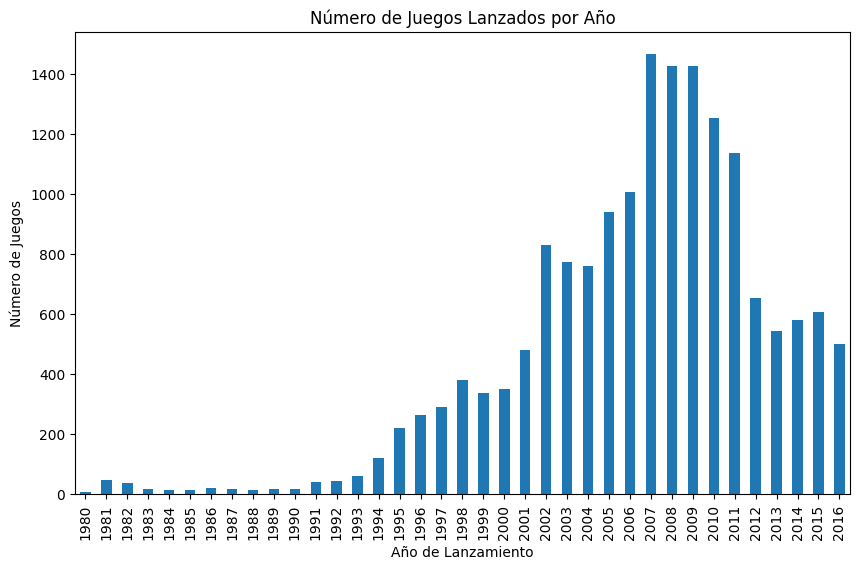

In [114]:
# Contar el número de juegos lanzados por año
games_per_year = games_df['year_of_release'].value_counts().sort_index()
print(games_per_year)
# Visualizar la distribución con el metodo plot
games_per_year.plot(kind='bar', figsize=(10, 6))
plt.title('Número de Juegos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Juegos')
plt.show()


### Ventas por plataforma

In [115]:
# Calculamos las ventas totales por plataforma usamos el metodo groupby
platform_sales = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print(platform_sales)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


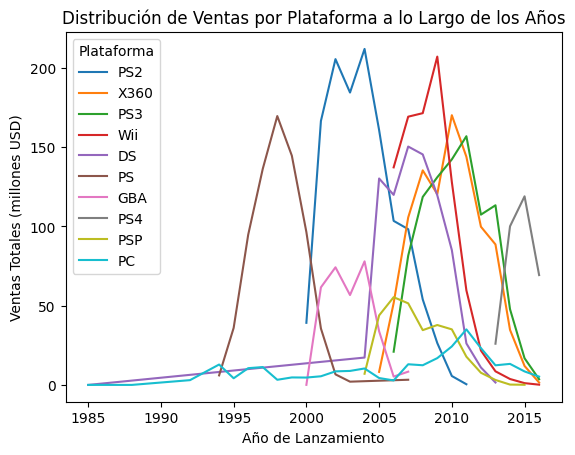

In [116]:
# Seleccionamos las 10 principales plataformas con mayores ventas
top_platforms = platform_sales.head(10).index

# Filtramos el DataFrame para estas plataformas con el metodo isin
top_platforms_sales = games_df[games_df['platform'].isin(top_platforms)]

# Creamos un gráfico de ventas por plataforma a lo largo de los años
for platform in top_platforms:
    platform_data = top_platforms_sales[top_platforms_sales['platform'] == platform]
    platform_sales_per_year = platform_data.groupby('year_of_release')['total_sales'].sum()
    plt.plot(platform_sales_per_year.index, platform_sales_per_year, label=platform)

plt.title('Distribución de Ventas por Plataforma a lo Largo de los Años')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones USD)')
plt.legend(title='Plataforma')
plt.show()


vemos que PS4 apareció alrededor de 2013 y comenzó a ganar popularidad rápidamente, X360 Surgió alrededor de 2005 y Wii ganó popularidad rápidamente alrededor de 2006-2007.

en PS2 su popularidad comenzó alrededor de 2000 y comenzó a disminuir alrededor de 2006, llegando a cero en ventas alrededor de 2012. Tardó unos 12 años desde su aparición hasta su desaparición. en GBA fue popular desde 2000, pero desapareció alrededor de 2007, tardando aproximadamente 7 años y PS fue popular en los años 90 pero desapareció hacia principios de los 2000, aproximadamente después de 10 años.

Las nuevas plataformas suelen aparecer y alcanzar su popularidad en 2 a 3 años después de su lanzamiento mientras que las plataformas antiguas suelen tardar entre 7 y 12 años en desaparecer completamente después de haber alcanzado su popularidad máxima.

### Período de Datos Relevante

In [117]:
# filtramos el dataframe para año de lanzamiento mayor o igual a 2010
relevant_years = games_df[games_df['year_of_release'] >= 2010]


se elije el año 2010 ya que apartir de este año vemos la desaparicion de plataformas anteriores teniendo una declinación significativa en ventas después de 2010. adicionalmente cerca a este año empiezan a aparecer nuevas plataformas que seran claves para el mercado de videojuegos en los años posteriores y representan una parte importante del mercado que evaluaremos(diciembre de 2016).

### Análisis de las Principales Plataformas

platform
PS3     587.74
X360    550.41
PS4     314.14
3DS     257.81
Wii     222.97
XOne    159.32
DS      123.75
PC      121.96
WiiU     82.19
PSP      64.05
PSV      53.81
PS2       6.09
Name: total_sales, dtype: float64


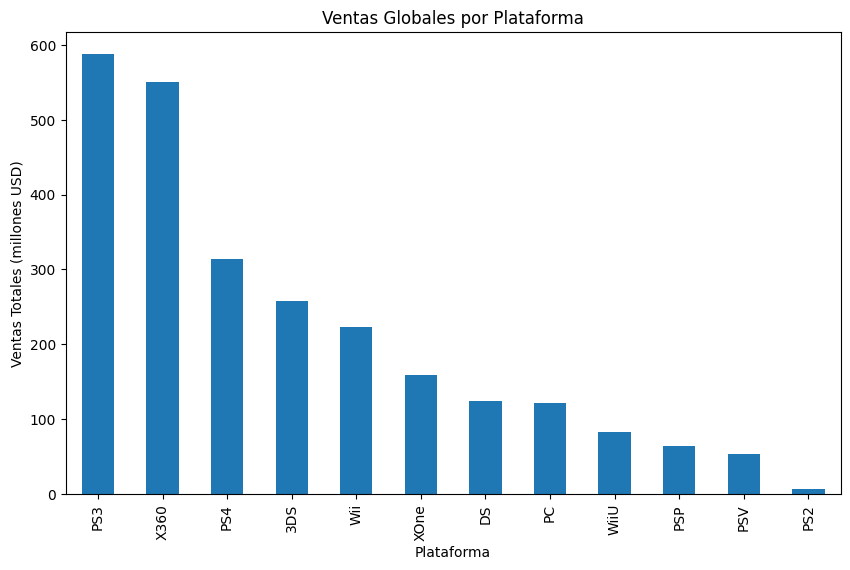

In [118]:
# Calculamos las ventas totales por plataforma usamos el metodo groupby

global_sales_per_platform = relevant_years.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print(global_sales_per_platform)

# Visualizamos la distribución anterior
global_sales_per_platform.plot(kind='bar', figsize=(10, 6))
plt.title('Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones USD)')
plt.show()


### Diagrama de Caja de Ventas por Plataforma


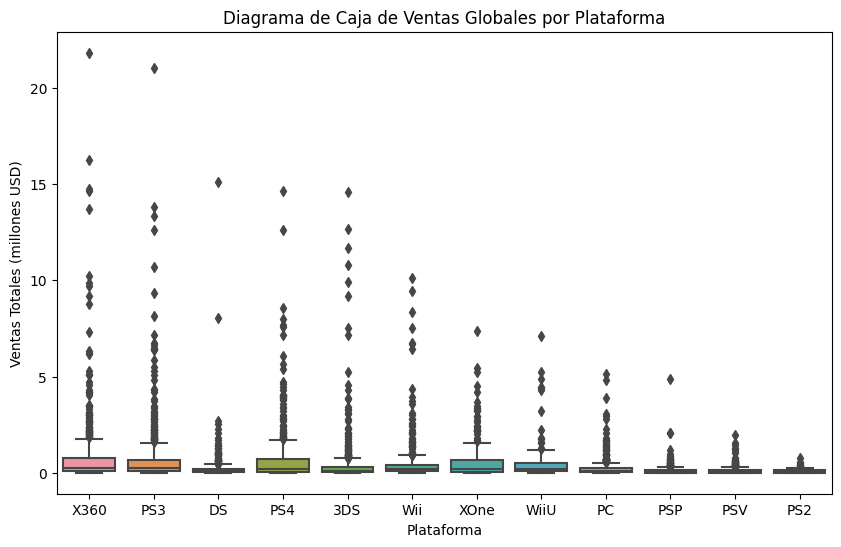

In [119]:
# Creamos un diagrama de caja para las ventas por plataforma con el metodo sns.boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='total_sales', data=relevant_years)
plt.title('Diagrama de Caja de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones USD)')
plt.show()


la variacion en las ventas es diferente en cada plataforma. X360 y PS3 muestran una gran dispersion de sus ventas, lo que indicaria que hay juegos con ventas muy altas pero tambien juegos con ventas muy bajas. adicionalmente estas plataformas presentan muchos mas valores atipicos lo que indica que algunos juegos fueron muy exitosos.

las plataformas PC y 3DS muestran ventas promedio más bajas. En el caso de PC, esto puede deberse a que tiene una amplia variedad del mercado de juegos de PC.

las plataformas PS4 y XOne tienen una distribución de ventas más reciente y con menor dispersión comparada con las plataformas anteriores, pero muestran ventas consistentes con algunos valores atipicos significativos, lo que podria sugerir que estan en fase de crecimiento, tienen ventas uniformes y apesar del poco tiempo tienen potencial de generar en el futuro juegos con ventas extremadamente altas.

### Correlación entre Reseñas y Ventas

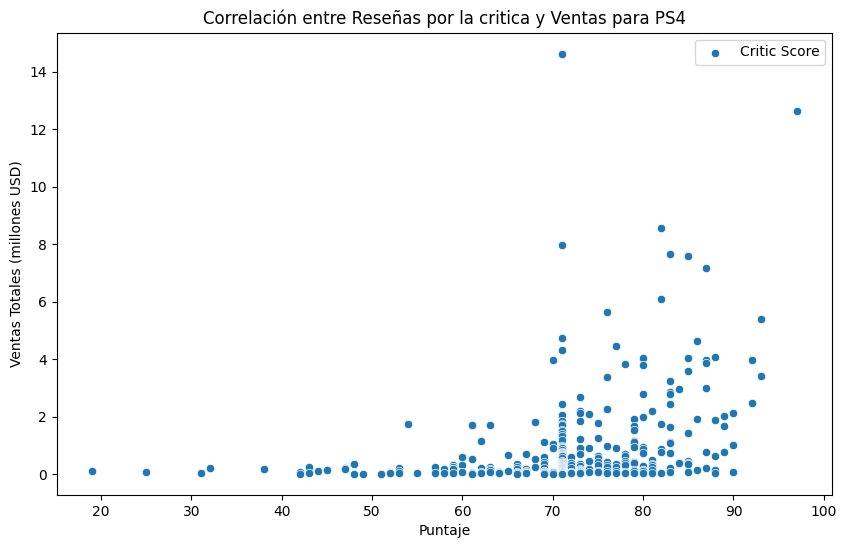

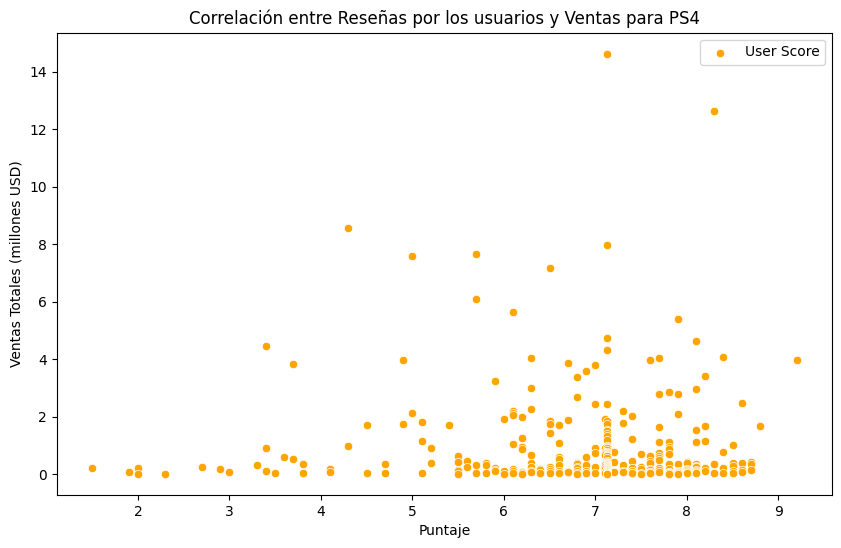

Correlación entre Critic Score y Ventas para PS4: 0.3387064530024634
Correlación entre User Score y Ventas PS4: -0.04539086100332412


In [120]:

# Filtramos los datos para la plataforma PS4
ps4_data = relevant_years[relevant_years['platform'] == 'PS4']

# Crear gráfico de dispersión para critic_score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_data, label='Critic Score')
plt.title('Correlación entre Reseñas por la critica y Ventas para PS4')
plt.xlabel('Puntaje')
plt.ylabel('Ventas Totales (millones USD)')
plt.legend()
plt.show()

# Crear gráfico de dispersión para user_score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=ps4_data, label='User Score', color= 'orange')
plt.title('Correlación entre Reseñas por los usuarios y Ventas para PS4')
plt.xlabel('Puntaje')
plt.ylabel('Ventas Totales (millones USD)')
plt.legend()
plt.show()

# Calculamos la correlación
critic_corr = ps4_data['critic_score'].corr(ps4_data['total_sales'])
user_corr = ps4_data['user_score'].corr(ps4_data['total_sales'])

print(f"Correlación entre Critic Score y Ventas para PS4: {critic_corr}")
print(f"Correlación entre User Score y Ventas PS4: {user_corr}")


De acuerdo a lo anterior podemos decir que hay una correlación positiva moderada entre las puntuaciones de los críticos y las ventas. Esto sugiere que, en general, los juegos con mejores reseñas de críticos tienden a vender más, aunque la relación no es extremadamente fuerte. esto podria indicar que no es el unico aspecto que tienen en cuenta al momento de comprar un juego, podrian tener en cuenta otras cosas como el nombre, la marca, etc.

de acuerdo a las puntuaciones de los usuarios existe una correlación negativa muy débil entre las puntuaciones de los usuarios y las ventas. El valor es muy cercano a cero, lo que indica que no hay una relación significativa entre las opiniones de los usuarios y las ventas de los juegos. De hecho, esta ligera correlación negativa podría sugerir que, en algunos casos, mejores puntuaciones de los usuarios están ligeramente asociadas con menores ventas.

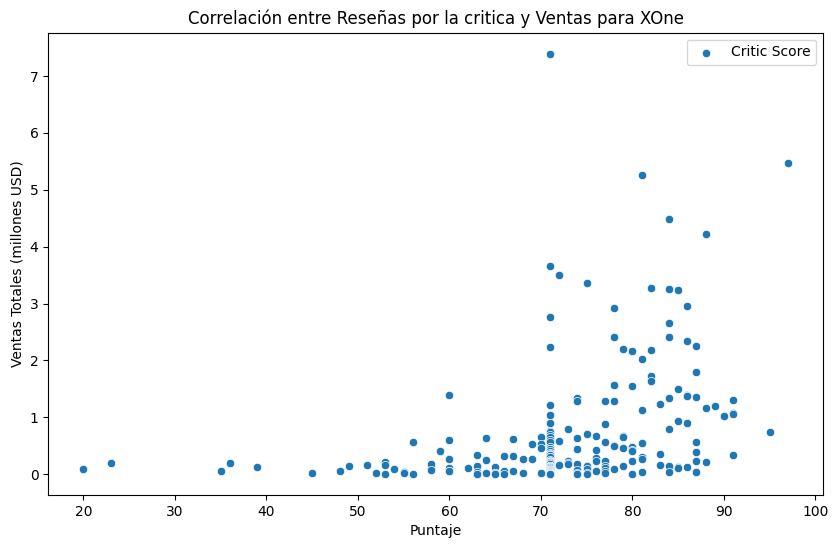

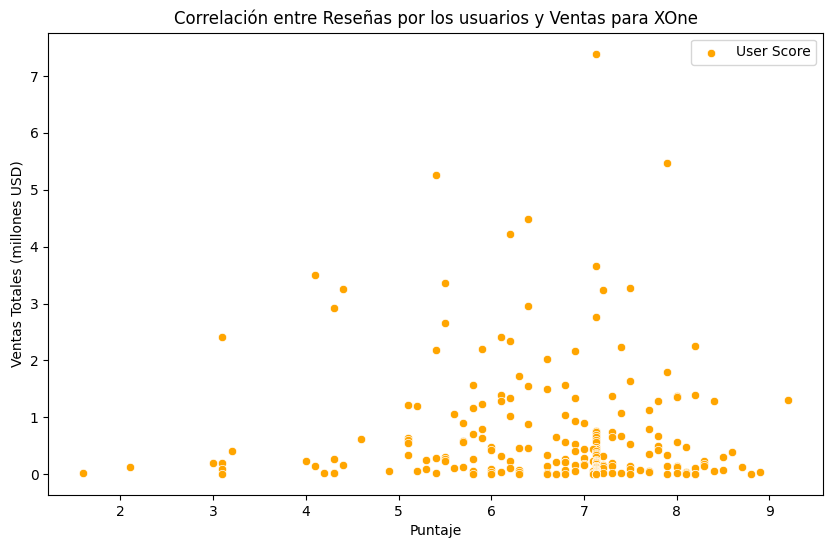

Correlación entre Critic Score y Ventas para XOne: 0.3604509779444023
Correlación entre User Score y Ventas para XOne: -0.08957370460604373


In [121]:
# realizamos la misma validacion para otras plataformas como Xone

# Filtramos los datos para la plataforma Xone
xone_data = relevant_years[relevant_years['platform'] == 'XOne']

# Crear gráfico de dispersión para critic_score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=xone_data, label='Critic Score')
plt.title('Correlación entre Reseñas por la critica y Ventas para XOne')
plt.xlabel('Puntaje')
plt.ylabel('Ventas Totales (millones USD)')
plt.legend()
plt.show()

# Crear gráfico de dispersión para user_score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=xone_data, label='User Score', color= 'orange')
plt.title('Correlación entre Reseñas por los usuarios y Ventas para XOne')
plt.xlabel('Puntaje')
plt.ylabel('Ventas Totales (millones USD)')
plt.legend()
plt.show()

# Calculamos la correlación
critic_corr = xone_data['critic_score'].corr(xone_data['total_sales'])
user_corr = xone_data['user_score'].corr(xone_data['total_sales'])

print(f"Correlación entre Critic Score y Ventas para XOne: {critic_corr}")
print(f"Correlación entre User Score y Ventas para XOne: {user_corr}")


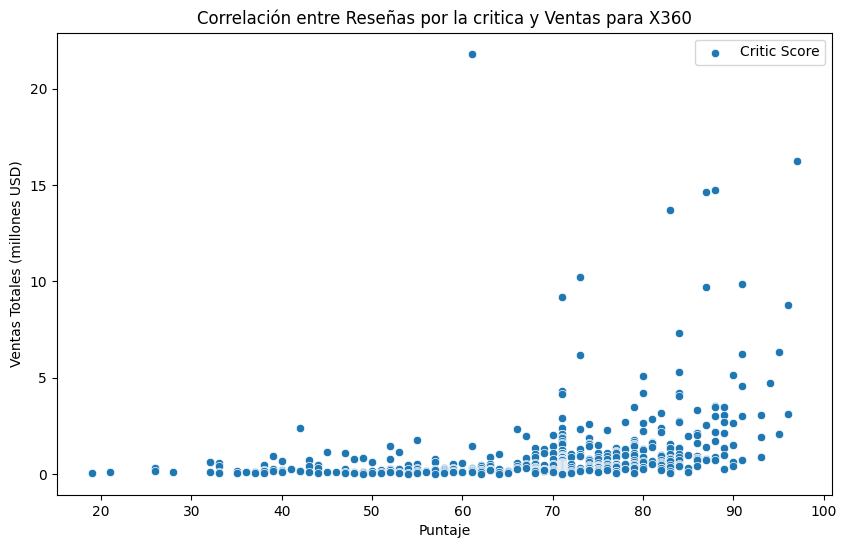

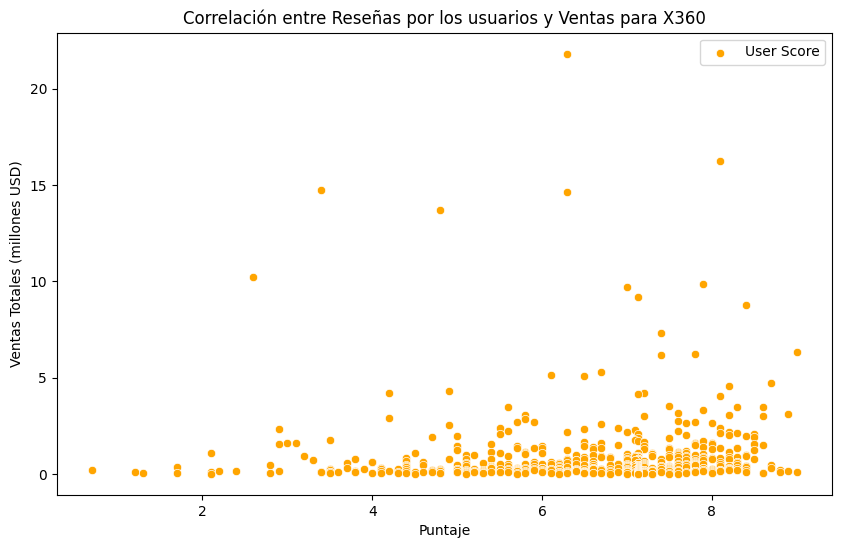

Correlación entre Critic Score y Ventas para X360: 0.3004872342568924
Correlación entre User Score y Ventas para X360: 0.019526313551675865


In [122]:
# realizamos la misma validacion para otras plataformas como X360

# Filtramos los datos para la plataforma X360
x360_data = relevant_years[relevant_years['platform'] == 'X360']

# Crear gráfico de dispersión para critic_score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=x360_data, label='Critic Score')
plt.title('Correlación entre Reseñas por la critica y Ventas para X360')
plt.xlabel('Puntaje')
plt.ylabel('Ventas Totales (millones USD)')
plt.legend()
plt.show()

# Crear gráfico de dispersión para user_score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=x360_data, label='User Score', color= 'orange')
plt.title('Correlación entre Reseñas por los usuarios y Ventas para X360')
plt.xlabel('Puntaje')
plt.ylabel('Ventas Totales (millones USD)')
plt.legend()
plt.show()

# Calculamos la correlación
critic_corr = x360_data['critic_score'].corr(x360_data['total_sales'])
user_corr = x360_data['user_score'].corr(x360_data['total_sales'])

print(f"Correlación entre Critic Score y Ventas para X360: {critic_corr}")
print(f"Correlación entre User Score y Ventas para X360: {user_corr}")


De acuerdo a las validaciones en las plataformas XOne y X360 vemos que ambas tienen un comportamiento muy similar a la plataforma PS4 donde hay una correlacion positiva moderada entre las puntuaciones de los críticos y las ventas. Igualmente para las puntuaciones de los usuarios existe una correlación negativa (negativa para XOne y positiva para X360) muy débil  muy cercanas a cero entre las puntuaciones de los usuarios y las ventas. lo que nuevamente podria indicar que no es el unico aspecto que tienen en cuenta al momento de comprar un juego, podrian tener en cuenta otras cosas como el nombre, la marca, etc.

###  Distribución de los juegos por Género

genre
Action          673.09
Shooter         479.74
Sports          328.39
Role-Playing    315.28
Misc            234.56
Racing          122.68
Platform        119.72
Fighting         81.59
Simulation       71.75
Adventure        61.00
Strategy         35.84
Puzzle           20.60
Name: total_sales, dtype: float64


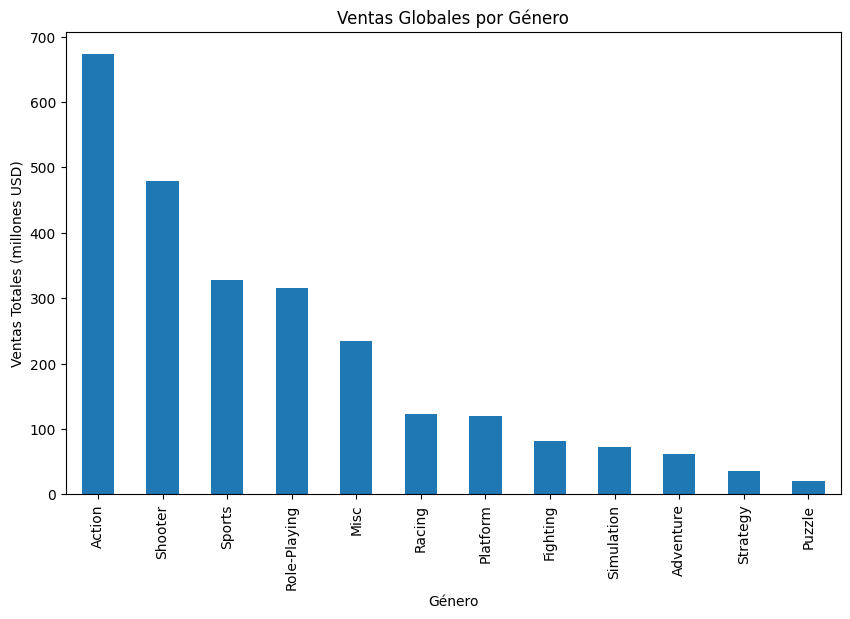

In [123]:
# agrupamos las ventas globales por género
genre_sales = relevant_years.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(genre_sales)

# Visualizamos la distribución
genre_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Ventas Globales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (millones USD)')
plt.show()

De acuerdo a lo anterior podemos evidenciar que los generos mas rentables son Action, Shooter y Sports que tienen ventas por encima de los 320 millones(USD) siendo Action el primero por lejos con ventas casi alrededor de los 700 millones. lo que nos da a entender que independientemente de la plataforma los usuarios siempre buscan un genero atractivo y popular.

adicionalmente vemos que los generos con menores ventas son Puzzle, Strategy y Adventure con ventas inferiores a los 61 millones, siendo puzzle el menor con 20.6 millones en ventas. lo que nos indicaria que tienen un publico mas especifico.

en general vemos que el mercado de videojuegos esta dominado por los juegos populares pero tambien hay varios generos que si bien no tienen las ventas de los populares, tienen ventas muy importantes para un publico diferente.

## Análisis de los juegos por región

### Plataformas principales

In [124]:
# Filtramos las columnas relevantes para cada región
regions = ['na_sales', 'eu_sales', 'jp_sales']

# Determinamos las cinco plataformas principales en cada región
top_platforms_per_region = {}
for region in regions:
    top_platforms_per_region[region] = (
        relevant_years.groupby('platform')[region]
        .sum()
        .sort_values(ascending=False)
        .head(5)
    )
    print(f'Top 5 plataformas en {region}:')
    print(top_platforms_per_region[region])
    print('\n')


Top 5 plataformas en na_sales:
platform
X360    334.18
PS3     229.25
Wii     121.20
PS4     108.74
XOne     93.12
Name: na_sales, dtype: float64


Top 5 plataformas en eu_sales:
platform
PS3     213.60
X360    163.41
PS4     141.09
PC       68.82
Wii      65.91
Name: eu_sales, dtype: float64


Top 5 plataformas en jp_sales:
platform
3DS    100.62
PS3     59.26
PSP     42.20
DS      27.90
PSV     21.84
Name: jp_sales, dtype: float64




Evidenciamos que en Norteamerica X360 lidera las ventas con 334.18 millones(USD), seguido de PS3 con 229.25 millones.Estas dos plataformas dominan claramente el mercado en esta región.Wii y PS4 también tienen una gran presencia, pero con un mercado mucho menor en comparación con X360 y PS3. XOne cierra el top 5 con un valor de ventas muy considerable.

En Europa PS3 es la plataforma líder con 213.60 millones(USD), pero X360 le sigue de cerca con 163.41 millones, mostrando que ambas plataformas tienen un mercado competitivo en esta región.
PS4 ocupa un lugar importante, lo que indica un crecimiento continuo en la popularidad de la plataforma PlayStation en Europa.
PC aparece en el top 5 de Europa, lo que indica una mayor popularidad del gaming en PC en esta región en comparación con NA.
Wii también está presente, pero con ventas menores.

En Japón 3DS es la plataforma dominante, con 100.62 millones(USD). PS3 y PSP son las siguientes en la lista, pero con cifras mucho menores en comparación con 3DS. DS aún tiene presencia en el mercado japonés, a pesar de ser una plataforma antigua.

En general Norteamerica muestra una fuerte preferencia por las plataformas X360/XOne, especialmente con el éxito de X360, mientras que en Europa las consolas PlayStation son las más dominantes, con un mercado de PC también relevante.
En Japón, las consolas portátiles dominan, con 3DS a la cabeza, reflejando una preferencia cultural por el gaming portátil.


### Géneros principales

In [125]:
# Determinamos los cinco géneros principales en cada región

top_genres_per_region = {}
for region in regions:
    top_genres_per_region[region] = (
        relevant_years.groupby('genre')[region]
        .sum()
        .sort_values(ascending=False)
        .head(5)
    )
    print(f'Top 5 géneros en {region}:')
    print(top_genres_per_region[region])
    print('\n')

Top 5 géneros en na_sales:
genre
Action          290.64
Shooter         237.47
Sports          156.81
Misc            123.80
Role-Playing    112.05
Name: na_sales, dtype: float64


Top 5 géneros en eu_sales:
genre
Action          233.63
Shooter         171.45
Sports          116.84
Role-Playing     75.48
Misc             66.09
Name: eu_sales, dtype: float64


Top 5 géneros en jp_sales:
genre
Role-Playing    103.54
Action           72.20
Misc             24.29
Platform         15.81
Adventure        15.67
Name: jp_sales, dtype: float64




Evidenciamos que en Norteamerica tenemos dos generos que predominan en la region, Action es el género más popular con 290.64 millones(USD) en ventas, seguido por Shooter con 237.47 millones. Sports ocupa el tercer lugar con 156.81 millones, lo que indica que los juegos deportivos también son populares en NA. Misc y Role-Playing completan el top 5, pero con cifras menores.

En Europa Action también es el género líder en Europa con 233.63 millones(USD), similar a NA. Shooter ocupa el segundo lugar, pero con ventas menores en comparación con NA. Sports sigue siendo popular en Europa, ocupando el tercer lugar con 116.84 millones. Role-Playing y Misc completan el top 5, lo que indica que estos géneros tienen una audiencia significativa, aunque menor en comparación con NA.

En Japón Role-Playing es el género dominante con 103.54 millones(USD) en ventas, lo que refleja una fuerte preferencia cultural por los juegos de rol en esta región. Action ocupa el segundo lugar, pero con ventas significativamente menores en comparación con Role-Playing. Misc, Platform, y Adventure completan el top 5, destacando que los juegos de plataforma y aventura es notable en esta región.

### Ventas por Clasificación ESRB

In [126]:
# Agrupamos las ventas por clasificación ESRB en cada región
esrb_sales_na = games_df.groupby('rating')['na_sales'].sum()
esrb_sales_eu = games_df.groupby('rating')['eu_sales'].sum()
esrb_sales_jp = games_df.groupby('rating')['jp_sales'].sum()

# Combinamos los datos de ventas por región en un DataFrame
esrb_sales_df = pd.DataFrame({
    'NA': esrb_sales_na,
    'EU': esrb_sales_eu,
    'JP': esrb_sales_jp
})

print(esrb_sales_df)

              NA      EU      JP
rating                          
AO          1.26    0.61    0.00
E        1292.99  710.25  198.11
E10+      353.32  188.52   40.20
EC          1.53    0.11    0.00
K-A         2.56    0.27    1.46
M         748.48  483.97   64.24
RP          0.00    0.08    0.00
T         759.75  427.03  151.40
unknown  1240.68  613.30  841.93


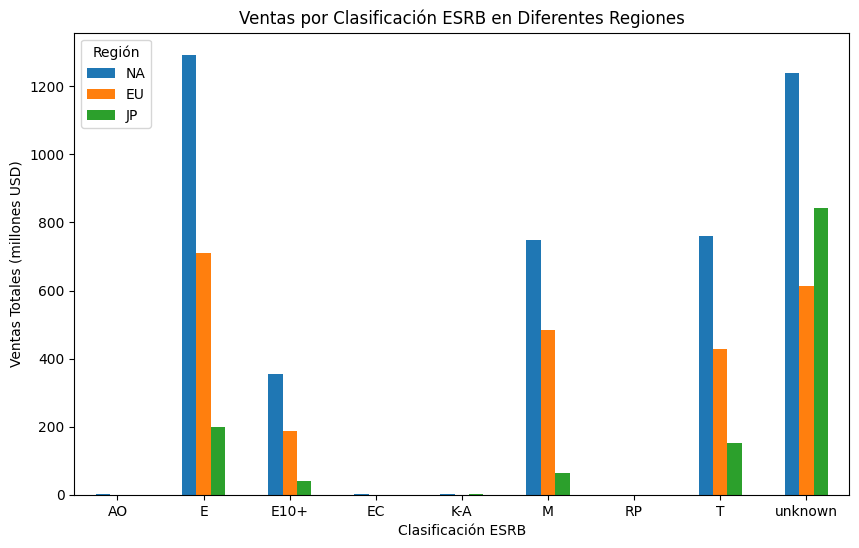

In [127]:
# Crear gráfico de barras con las ventas de cada región
esrb_sales_df.plot(kind='bar', figsize=(10, 6))

plt.title('Ventas por Clasificación ESRB en Diferentes Regiones')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas Totales (millones USD)')
plt.xticks(rotation=0)  # para mantener las etiquetas de x horizontales
plt.legend(title='Región')

# Mostrar la gráfica
plt.show()

De acuerdo a la grafica  en Norteamerica vemos que la Clasificación Everyone(E) tiene las ventas más altas (1292.99 millones), lo que sugiere que los juegos clasificados como E son muy populares. Las clasificaciones T (Teen) y M (Mature) también tienen ventas significativas, con 759.75 millones y 748.48 millones, respectivamente. Las clasificaciones menos comunes como AO (Adults Only), EC (Early Childhood) y K-A (Kids to Adults) tienen ventas casi insignificantes.

en Europa la clasificación E también lidera en ventas con 710.25 millones. Las clasificaciones T y M siguen siendo populares, pero con un menor volumen de ventas que en NA. Las clasificaciones como AO, EC, y K-A tienen ventas muy bajas, lo que indica una tendencia similar a la de NA.

en Japón La clasificación E también es popular, con 198.11 millones en ventas, seguida de T con 151.40 millones. Las ventas de juegos clasificados como M son considerablemente más bajas en Japón que en NA y EU.

En general, las clasificaciones de ESRB parecen afectar significativamente las ventas en Norteamerica y Europa, donde las clasificaciones E, T, y M dominan el mercado. En Japón, la influencia de estas clasificaciones es menos clara, posiblemente debido a diferencias culturales o de clasificación.

## Prueba de hipótesis estadisticas

### Hipótesis en plataformas Xbox One y PC 

In [128]:
#Hipotesis Nula (Ho): "Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales".

#Hipotesis Alternativa (H1): "Si hay diferencia entre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC"

#filtramos los datos para las plataformas XOne y PC
xone_scores = relevant_years[relevant_years['platform'] == 'XOne']['user_score'].dropna()

pc_scores = relevant_years[relevant_years['platform'] == 'PC']['user_score'].dropna()

# Realizamos la prueba de Levene para evaluar la igualdad de las varianzas
levene_stat, levene_p = st.levene(xone_scores, pc_scores)

# Decidimos si usamos equal_var=True o False según el resultado de la prueba de Levene
if levene_p < 0.05:
    equal_var = False
    print("Las varianzas son significativamente diferentes. Usaremos equal_var=False en la prueba t.")
else:
    equal_var = True
    print("No hay evidencia suficiente para decir que las varianzas son diferentes. Usaremos equal_var=True en la prueba t.")

#realizamos la prueba t para probar la hipotesis
alpha = 0.05 # colocamos el nivel de significancia estadística crítica, si el␣valor p es menor que alpha, rechazamos la hipótesis
results = st.ttest_ind(xone_scores, pc_scores, equal_var = equal_var)
print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparamos el valor p con alpha
    print("Rechazamos la hipótesis nula, Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son significativamente diferentes")
else:
    print("No podemos rechazar la hipótesis nula, No hay evidencia suficiente para decir que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes")

Las varianzas son significativamente diferentes. Usaremos equal_var=False en la prueba t.
valor p:  0.7724394900919623
No podemos rechazar la hipótesis nula, No hay evidencia suficiente para decir que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes


### Hipótesis en los géneros de Acción y Deportes 

In [129]:
#Hipotesis Nula (Ho): "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.".

#Hipotesis Alternativa (H1): "Si hay diferencia entre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes."

#filtramos los datos para los generos Action y Sports
action_scores = relevant_years[relevant_years['genre'] == 'Action']['user_score'].dropna()

sports_scores = relevant_years[relevant_years['genre'] == 'Sports']['user_score'].dropna()

# Realizamos la prueba de Levene para evaluar la igualdad de las varianzas
levene_stat1, levene_p1 = st.levene(action_scores, sports_scores)

# Decidimos si usamos equal_var=True o False según el resultado de la prueba de Levene
if levene_p1 < 0.05:
    equal_var = False
    print("Las varianzas son significativamente diferentes. Usaremos equal_var=False en la prueba t.")
else:
    equal_var = True
    print("No hay evidencia suficiente para decir que las varianzas son diferentes. Usaremos equal_var=True en la prueba t.")

#realizamos la prueba t para probar la hipotesis
alpha = 0.05 # colocamos el nivel de significancia estadística crítica, si el␣valor p es menor que alpha, rechazamos la hipótesis

results1 = st.ttest_ind(action_scores, sports_scores, equal_var = equal_var)
print('valor p: ', results1.pvalue) # extraer el valor p

if results1.pvalue < alpha: # comparamos el valor p con alpha
    print("Rechazamos la hipótesis nula, las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son significativamente diferentes")
else:
    print("No podemos rechazar la hipótesis nula, No hay evidencia suficiente para decir que las calificaciones promedio de los usuarios para para los géneros de Acción y Deportes son diferentes")

Las varianzas son significativamente diferentes. Usaremos equal_var=False en la prueba t.
valor p:  2.4986637204460458e-14
Rechazamos la hipótesis nula, las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son significativamente diferentes


Con el fin de realizar la prueba de hipotesis entre dos poblaciones estadisticas diferentes procedemos a utilizar la función scipy.stats.ttest_ind(array1, array2, equal_var). la cual nos permite comparar las medias de dos poblaciones y validar si son iguales o no. 
teniendo en cuenta lo anterior se formula la hipotesis nula afirmando si los promedio de las criticas de usuario para ambas plataformas (ambos generos en el caso de la otra hipotesis) son iguales, y la hipotesis alternativa se formula afirmado que hay diferencias del promedio de las criticas de usuario para ambas plataformas (ambos generos en el caso de la otra hipotesis).

## Conclusión general

Se realiza la validación del lanzamiento de juegos por año donde el grafico de barras nos muestra una tendencia de constante crecimiento desde el año 2000 hasta el año 2011, siendo los años del 2007 al 2009 donde mas juegos se han lanzado.  Esto puede reflejar un auge en la industria del videojuego, posiblemente debido a la expansión de las plataformas de juegos y el aumento en el número de desarrolladores.

al analizar las ventas de las 10 plataformas mas populares, el grafico nos muestra el crecimiento de cada plataforma hasta su máximo pico en ventas y desde cuando empieza a disminuir hasta su desaparición si es una plataforma antigua. de lo anterior podemos ver un patrón que las ventas de la mayoría de plataformas antiguas se dan en un periodo de 7 a 12 años desde su lanzamiento hasta su desaparición, adicionalmente las plataformas nuevas suelen alcanzar su popularidad en 2 a 3 años después de su lanzamiento.

Se trabajo con los datos desde el año 2010 en adelante ya que apartir de este año vemos la desaparicion de plataformas anteriores teniendo una declinación significativa en ventas después de 2010. adicionalmente cerca a este año empiezan a aparecer nuevas plataformas que seran claves para el mercado de videojuegos en los años posteriores y representan una parte importante del mercado para el año 2016.

el diagrama de caja de las ventas globales por plataforma muestra que hay diferencias significativas en las ventas entre plataformas, con algunas que claramente lideran en ventas totales y otras que muestran un rendimiento más modesto. Esto es crucial para identificar cuáles plataformas podrían ser más rentables para futuras campañas y lanzamientos.

al agrupar las plataformas por regiones se ve una clara tendencia de la preferencia en Norteamérica por las plataformas de Microsoft(X360 y XOne) y en Europa la tendencia en el crecimiento por plataformas de PlayStation, asi mismo en Japón es evidente la preferencia por plataformas gaming portátiles. adicionalmente se evidencia al agrupar los géneros por regiones la preferencia de géneros de accion y deportes por parte de regiones de occidente y en menor medida en la región del país Japones, donde prefieren el genero de Role-playing. Esto nos puede ayudar para realizar un enfoque de los juegos para cada plataforma y por genero teniendo en cuenta la región a explorar.

las clasificaciones de ESRB parecen afectar significativamente las ventas en Norteamérica y Europa, donde las clasificaciones E, T, y M dominan el mercado. En Japón, la influencia de estas clasificaciones es menos clara, posiblemente debido a diferencias culturales o de clasificación.

Al realizar la prueba t para comparar las calificaciones promedio para las plataformas XOne y PC indican que no hay suficiente evidencia para rechazar la hipótesis nula. a diferencia de la comparación de las calificaciones promedio para los géneros Accion y Deportes la cual nos indica que rechaza la hipótesis nula ya que las calificaciones entre los géneros en cuestión son significativamente diferentes.